<a href="https://colab.research.google.com/github/ArmanveerKaur/GAN-based-data-augmentation/blob/main/autism_data_augmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

def collect_and_download(derivative, pipeline, strategy, out_dir, diagnosis):
    import os
    import urllib.request as request

    mean_fd_thresh = 0.2
    s3_prefix = 'https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative'
    s3_pheno_path = '/'.join([s3_prefix, 'Phenotypic_V1_0b_preprocessed1.csv'])

    derivative = derivative.lower()
    pipeline = pipeline.lower()
    strategy = strategy.lower()

    if 'roi' in derivative:
        extension = '.1D'
    else:
        extension = '.nii.gz'

    if not os.path.exists(out_dir):
        print('Could not find {0}, creating now...'.format(out_dir))
        os.makedirs(out_dir)

    s3_pheno_file = request.urlopen(s3_pheno_path)
    pheno_list = s3_pheno_file.readlines()

    header = pheno_list[0].decode().split(',')
    try:
        site_idx = header.index('SITE_ID')
        file_idx = header.index('FILE_ID')
        age_idx = header.index('AGE_AT_SCAN')
        sex_idx = header.index('SEX')
        dx_idx = header.index('DX_GROUP')
        mean_fd_idx = header.index('func_mean_fd')
    except Exception as exc:
        err_msg = 'Unable to extract header information from the pheno file...'
        raise Exception(err_msg)

    s3_paths = []
    for pheno_row in pheno_list[1:]:
        cs_row = pheno_row.decode().split(',')

        try:
            row_file_id = cs_row[file_idx]
            row_site = cs_row[site_idx]
            row_age = float(cs_row[age_idx])
            row_sex = cs_row[sex_idx]
            row_dx = cs_row[dx_idx]
            row_mean_fd = float(cs_row[mean_fd_idx])
        except Exception as e:
            continue

        if row_file_id == 'no_filename':
            continue
        if row_mean_fd >= mean_fd_thresh:
            continue

        if (diagnosis == 'asd' and row_dx != '1') or (diagnosis == 'tdc' and row_dx != '2'):
            continue

        filename = row_file_id + '_' + derivative + extension
        s3_path = '/'.join([s3_prefix, 'Outputs', pipeline, strategy, derivative, filename])
        s3_paths.append(s3_path)

    total_num_files = len(s3_paths)
    for path_idx, s3_path in enumerate(s3_paths):
        rel_path = s3_path.lstrip(s3_prefix)
        download_file = os.path.join(out_dir, rel_path)
        download_dir = os.path.dirname(download_file)
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)
        try:
            if not os.path.exists(download_file):
                print('Retrieving: {0}'.format(download_file))
                request.urlretrieve(s3_path, download_file)
                print('{0:.3f}% percent complete'.format(100*(float(path_idx+1)/total_num_files)))
            else:
                print('File {0} already exists, skipping...'.format(download_file))
        except Exception as exc:
            print('There was a problem downloading {0}.\n Check input arguments and try again.'.format(s3_path))

    print('Done!')

desired_derivative = 'rois_cc200'
desired_pipeline = 'cpac'
desired_strategy = 'filt_global'
download_data_dir = 'preprocessed_dataset'
desired_diagnosis = 'both'
collect_and_download(desired_derivative, desired_pipeline, desired_strategy, download_data_dir, desired_diagnosis)


Could not find preprocessed_dataset, creating now...
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050004_rois_cc200.1D
0.113% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050005_rois_cc200.1D
0.226% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050006_rois_cc200.1D
0.339% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050007_rois_cc200.1D
0.452% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050008_rois_cc200.1D
0.566% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050009_rois_cc200.1D
0.679% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050010_rois_cc200.1D
0.792% percent complete
Retrieving: preprocessed_dataset/Outputs/cpac/filt_global/rois_cc200/Pitt_0050011_rois_cc200.1D
0.905% perc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

DRIVE_DIR = "/content/drive/MyDrive/ABIDE_PREPROCESSED"
os.makedirs(DRIVE_DIR, exist_ok=True)

print("Saving downloaded ABIDE files to:", DRIVE_DIR)


Saving downloaded ABIDE files to: /content/drive/MyDrive/ABIDE_PREPROCESSED


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATA_DIR = "/content/drive/MyDrive/ABIDE_CC200"
import os
os.makedirs(DATA_DIR, exist_ok=True)

print("Saving dataset to:", DATA_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving dataset to: /content/drive/MyDrive/ABIDE_CC200


In [ ]:
import pandas as pd

PHENO_CSV = "/content/drive/MyDrive/Phenotypic_V1_0b_preprocessed1.csv"

df = pd.read_csv(PHENO_CSV)

print("Columns:", df.columns.tolist())
file_ids = df["FILE_ID"].dropna().astype(str).tolist()

print("Total FILE_IDs loaded:", len(file_ids))
print("Example:", file_ids[:10])


Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'SUB_ID', 'X', 'subject', 'SITE_ID', 'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX', 'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C', 'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE', 'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV', 'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB', 'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION', 'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION', 'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL', 'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME', 'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED', 'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED', 'VINELAND_DOMESTIC_V_SCALED', 'VINELAND_COMMUNITY_V_SCALE

In [ ]:
import requests
import os

base_url = "https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs"

pipeline = "cpac"
strategy = "filt_global"
derivative = "rois_cc200"
ext = "1D"

def construct_url(file_id):
    return f"{base_url}/{pipeline}/{strategy}/{derivative}/{file_id}_{derivative}.{ext}"

def download_file(url, destination):
    r = requests.get(url, stream=True)

    if r.status_code != 200:
        print(f"Not found: {url}")
        return False

    with open(destination, "wb") as f:
        for chunk in r.iter_content(8192):
            f.write(chunk)

    print(f"Saved: {destination}")
    return True

success, failed = 0, []

for fid in file_ids:
    url = construct_url(fid)
    save_path = os.path.join(DATA_DIR, f"{fid}_{derivative}.{ext}")

    if not download_file(url, save_path):
        failed.append(fid)
    else:
        success += 1

print("Successful files:", success)
print("Failed:", len(failed))
print("Failed FILE_IDs:", failed[:20])


Not found: https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_global/rois_cc200/no_filename_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050003_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050004_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050005_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050006_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050007_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050008_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050009_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050010_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050011_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050012_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050013_rois_cc200.1D
Saved: /content/drive/MyDrive/ABIDE_CC200/Pitt_0050014_rois_cc200.1D
Saved: /content/drive/MyDrive/ABID

In [ ]:
import os
import numpy as np
import pandas as pd
import re

DATA_DIR = "/content/drive/MyDrive/ABIDE_CC200"
PHENO_PATH = "/content/drive/MyDrive/Phenotypic_V1_0b_preprocessed1.csv"
SAVE_DIR = "/content/drive/MyDrive/ABIDE_FC_DATA"
os.makedirs(SAVE_DIR, exist_ok=True)

pheno = pd.read_csv(PHENO_PATH)

label_dict = {}
for _, row in pheno.iterrows():
    file_name = str(row["FILE_ID"])
    if file_name == "no_filename":
        continue
    label_dict[file_name] = 1 if row["DX_GROUP"] == 1 else 0

files = [f for f in os.listdir(DATA_DIR) if f.endswith(".1D")]

X, y = [], []
subjects_used = 0

for fname in files:
    matched_id = None
    for fid in label_dict.keys():
        if fname.startswith(fid):
            matched_id = fid
            break
    if matched_id is None:
        continue
    try:
        ts = np.loadtxt(os.path.join(DATA_DIR, fname))
    except:
        continue
    if ts.ndim != 2 or ts.shape[1] != 200:
        continue
    fc = np.corrcoef(ts.T)
    if fc.shape != (200, 200):
        continue
    X.append(fc)
    y.append(label_dict[matched_id])
    subjects_used += 1
    if subjects_used % 20 == 0:
        print(f"Processed {subjects_used} subjects...")

X = np.array(X)
y = np.array(y)

np.save(os.path.join(SAVE_DIR, "X_fc.npy"), X)
np.save(os.path.join(SAVE_DIR, "y_labels.npy"), y)

print("Completed")
print("Total FC matrices:", len(X))
print("Total labels:", len(y))
print("Final shapes:", X.shape, y.shape)
print(f"Saved:\n - {SAVE_DIR}/X_fc.npy\n - {SAVE_DIR}/y_labels.npy")


Processed 20 subjects...
Processed 40 subjects...


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Processed 60 subjects...
Processed 80 subjects...
Processed 100 subjects...
Processed 120 subjects...
Processed 140 subjects...
Processed 160 subjects...
Processed 180 subjects...
Processed 200 subjects...
Processed 220 subjects...
Processed 240 subjects...
Processed 260 subjects...
Processed 280 subjects...
Processed 300 subjects...
Processed 320 subjects...
Processed 340 subjects...
Processed 360 subjects...
Processed 380 subjects...
Processed 400 subjects...
Processed 420 subjects...
Processed 440 subjects...
Processed 460 subjects...
Processed 480 subjects...
Processed 500 subjects...
Processed 520 subjects...
Processed 540 subjects...
Processed 560 subjects...
Processed 580 subjects...
Processed 600 subjects...
Processed 620 subjects...
Processed 640 subjects...
Processed 660 subjects...
Processed 680 subjects...
Processed 700 subjects...
Processed 720 subjects...
Processed 740 subjects...
Processed 760 subjects...
Processed 780 subjects...
Processed 800 subjects...
Processed 820 

In [ ]:
import numpy as np

X = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_fc.npy")
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

print(X.shape, y.shape)

(1035, 200, 200) (1035,)


In [ ]:
n = X.shape[1]
triu_indices = np.triu_indices(n, k=1)
X_flat = X[:, triu_indices[0], triu_indices[1]]
print(X_flat.shape)

(1035, 19900)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(828, 19900) (207, 19900)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5458937198067633
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       106
           1       0.54      0.50      0.52       101

    accuracy                           0.55       207
   macro avg       0.55      0.54      0.54       207
weighted avg       0.55      0.55      0.54       207



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_flat, y, cv=5)
print("5-fold CV accuracy:", scores.mean())

5-fold CV accuracy: 0.6251207729468599


In [ ]:
import numpy as np

X = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_fc.npy")
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

def flatten_upper_triangle(fc_matrix):
    return fc_matrix[np.triu_indices_from(fc_matrix, k=1)]

X_flat = np.array([flatten_upper_triangle(fc) for fc in X])

print("Original X shape:", X.shape)
print("Flattened X shape:", X_flat.shape)
print("Labels shape:", y.shape)

np.save(os.path.join(SAVE_DIR, "X_flat.npy"), X_flat)
np.save(os.path.join(SAVE_DIR, "y_labels.npy"), y)

print(f"Flattened features saved at {SAVE_DIR}/X_flat.npy")

Original X shape: (1035, 200, 200)
Flattened X shape: (1035, 19900)
Labels shape: (1035,)
Flattened features saved at /content/drive/MyDrive/ABIDE_FC_DATA/X_flat.npy


step 2 test train split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_flat = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_flat.npy")
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train labels:", y_train.shape)
print("Test labels:", y_test.shape)


Train shape: (828, 19900)
Test shape: (207, 19900)
Train labels: (828,)
Test labels: (207,)


step 3 train classifier

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load flattened FC matrices and labels
X_flat = np.array([fc[np.triu_indices_from(fc, k=1)] for fc in np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_fc.npy")])
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

X_flat = np.nan_to_num(X_flat, nan=0.0)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.6376811594202898
Confusion Matrix:
 [[69 37]
 [38 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65       106
           1       0.63      0.62      0.63       101

    accuracy                           0.64       207
   macro avg       0.64      0.64      0.64       207
weighted avg       0.64      0.64      0.64       207



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

X = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_fc.npy")
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

def flatten_upper_triangle(fc_matrix):
    return fc_matrix[np.triu_indices_from(fc_matrix, k=1)]

X_flat = np.array([flatten_upper_triangle(fc) for fc in X])

imputer = SimpleImputer(strategy="mean")
X_flat = imputer.fit_transform(X_flat)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Test Accuracy: 0.6521739130434783
Confusion Matrix:
 [[70 36]
 [36 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       106
           1       0.64      0.64      0.64       101

    accuracy                           0.65       207
   macro avg       0.65      0.65      0.65       207
weighted avg       0.65      0.65      0.65       207



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

X = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_fc.npy")
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

def flatten_upper_triangle(fc_matrix):
    return fc_matrix[np.triu_indices_from(fc_matrix, k=1)]

X_flat = np.array([flatten_upper_triangle(fc) for fc in X])

imputer = SimpleImputer(strategy="mean")
X_flat = imputer.fit_transform(X_flat)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = HistGradientBoostingClassifier(max_iter=500, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Test Accuracy: 0.642512077294686
Confusion Matrix:
 [[88 18]
 [56 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.83      0.70       106
           1       0.71      0.45      0.55       101

    accuracy                           0.64       207
   macro avg       0.66      0.64      0.63       207
weighted avg       0.66      0.64      0.63       207



Step 4: Handle NaNs, optional PCA

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

X_flat = np.array([fc[np.triu_indices_from(fc, k=1)] for fc in np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_fc.npy")])
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

imputer = SimpleImputer(strategy="mean")
X_flat = imputer.fit_transform(X_flat)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Step 4 completed")
print("Train shape after PCA:", X_train_pca.shape)
print("Test shape after PCA:", X_test_pca.shape)


Step 4 completed
Train shape after PCA: (828, 200)
Test shape after PCA: (207, 200)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X_flat = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_flat.npy")
y = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_labels.npy")

imputer = SimpleImputer(strategy='mean')
X_flat_imputed = imputer.fit_transform(X_flat)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat_imputed, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

SAVE_DIR = "/content/drive/MyDrive/ABIDE_FC_DATA"
np.save(f"{SAVE_DIR}/X_train_pca.npy", X_train_pca)
np.save(f"{SAVE_DIR}/X_test_pca.npy", X_test_pca)
np.save(f"{SAVE_DIR}/y_train.npy", y_train)
np.save(f"{SAVE_DIR}/y_test.npy", y_test)

print("Step 4 completed with imputation.")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)


Step 4 completed with imputation.
X_train_pca shape: (828, 200)
X_test_pca shape: (207, 200)


Next (Step 5):
 (XGB classifier)
Train a better classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:29:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.6570048309178744
Confusion Matrix:
 [[90 16]
 [55 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.85      0.72       106
           1       0.74      0.46      0.56       101

    accuracy                           0.66       207
   macro avg       0.68      0.65      0.64       207
weighted avg       0.68      0.66      0.64       207



step 6 GAN

In [ ]:
np.save("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_samples.npy", synthetic_samples)
np.save("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_labels.npy", synthetic_labels)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_pca.npy")
y_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_train.npy")

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)

noise_dim = 100
data_dim = X_train.shape[1]
batch_size = 64
epochs = 2000

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, data_dim)
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=1e-4, betas=(0.5, 0.999))

real_label_smooth = 0.9

for epoch in range(1, epochs + 1):
    permutation = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        real_data = X_train[indices]
        batch_size_curr = real_data.size(0)
        real_labels = torch.full((batch_size_curr, 1), real_label_smooth, device=device)
        fake_labels = torch.zeros((batch_size_curr, 1), device=device)

        D.zero_grad()
        outputs_real = D(real_data)
        loss_real = criterion(outputs_real, real_labels)

        z = torch.randn(batch_size_curr, noise_dim, device=device)
        fake_data = G(z)
        outputs_fake = D(fake_data.detach())
        loss_fake = criterion(outputs_fake, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        G.zero_grad()
        outputs = D(fake_data)
        loss_G = criterion(outputs, real_labels)
        loss_G.backward()
        optimizer_G.step()

    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{epochs}] | D_loss: {loss_D.item():.4f} | G_loss: {loss_G.item():.4f}")

z = torch.randn(400, noise_dim, device=device)
synthetic_samples = G(z).detach().cpu().numpy()
synthetic_labels = np.ones(400)

np.save("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_samples.npy", synthetic_samples)
np.save("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_labels.npy", synthetic_labels)

print("Synthetic samples shape:", synthetic_samples.shape)
print("Synthetic labels shape:", synthetic_labels.shape)


Epoch [50/2000] | D_loss: 1.0203 | G_loss: 0.8934
Epoch [100/2000] | D_loss: 0.7467 | G_loss: 1.5997
Epoch [150/2000] | D_loss: 0.5822 | G_loss: 1.9755
Epoch [200/2000] | D_loss: 0.4720 | G_loss: 2.6149
Epoch [250/2000] | D_loss: 0.4529 | G_loss: 3.0108
Epoch [300/2000] | D_loss: 0.4112 | G_loss: 3.1541
Epoch [350/2000] | D_loss: 0.4064 | G_loss: 3.3568
Epoch [400/2000] | D_loss: 0.4960 | G_loss: 3.7029
Epoch [450/2000] | D_loss: 0.4801 | G_loss: 3.9144
Epoch [500/2000] | D_loss: 0.4071 | G_loss: 4.0518
Epoch [550/2000] | D_loss: 0.4106 | G_loss: 3.3177
Epoch [600/2000] | D_loss: 0.4059 | G_loss: 4.1065
Epoch [650/2000] | D_loss: 0.3766 | G_loss: 3.5305
Epoch [700/2000] | D_loss: 0.3781 | G_loss: 4.6107
Epoch [750/2000] | D_loss: 0.3696 | G_loss: 4.2910
Epoch [800/2000] | D_loss: 0.3724 | G_loss: 3.8785
Epoch [850/2000] | D_loss: 0.3654 | G_loss: 4.1492
Epoch [900/2000] | D_loss: 0.4032 | G_loss: 3.8698
Epoch [950/2000] | D_loss: 0.3685 | G_loss: 4.4650
Epoch [1000/2000] | D_loss: 0.37

step 7

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_pca.npy")
y_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_train.npy")
X_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_test_pca.npy")
y_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_test.npy")

X_gan = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_samples.npy")
y_gan = np.ones(X_gan.shape[0])

X_train_aug = np.vstack((X_train, X_gan))
y_train_aug = np.hstack((y_train, y_gan))

print("After augmentation:")
print("X_train_aug:", X_train_aug.shape, "y_train_aug:", y_train_aug.shape)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_aug, y_train_aug)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Test Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


After augmentation:
X_train_aug: (1028, 200) y_train_aug: (1028,)
Test Accuracy: 0.5893719806763285
Confusion Matrix:
 [[96 10]
 [75 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.91      0.69       106
           1       0.72      0.26      0.38       101

    accuracy                           0.59       207
   macro avg       0.64      0.58      0.54       207
weighted avg       0.64      0.59      0.54       207



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_pca.npy")
y_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_train.npy")
X_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_test_pca.npy")
y_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_test.npy")

synthetic_samples = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_samples.npy")
synthetic_labels = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/gan_synthetic_labels.npy")

class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)
total_count = len(y_train)

num_synth_per_class = synthetic_samples.shape[0] // 2
synthetic_labels_balanced = np.array([0]*num_synth_per_class + [1]*num_synth_per_class)
synthetic_samples_balanced = synthetic_samples[:num_synth_per_class*2]

X_train_aug = np.vstack((X_train, synthetic_samples_balanced))
y_train_aug = np.hstack((y_train, synthetic_labels_balanced))

print(f"Before augmentation: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Synthetic samples: {synthetic_samples_balanced.shape}, Synthetic labels: {synthetic_labels_balanced.shape}")
print(f"After augmentation: X_train_aug: {X_train_aug.shape}, y_train_aug: {y_train_aug.shape}")

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_aug, y_train_aug)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {acc}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Before augmentation: X_train: (828, 200), y_train: (828,)
Synthetic samples: (200, 200), Synthetic labels: (200,)
After augmentation: X_train_aug: (1028, 200), y_train_aug: (1028,)
Test Accuracy: 0.6135265700483091
Confusion Matrix:
 [[94 12]
 [68 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.89      0.70       106
           1       0.73      0.33      0.45       101

    accuracy                           0.61       207
   macro avg       0.66      0.61      0.58       207
weighted avg       0.65      0.61      0.58       207



In [ ]:
import numpy as np

np.save("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_aug.npy", X_train_aug)
np.save("/content/drive/MyDrive/ABIDE_FC_DATA/y_train_aug.npy", y_train_aug)

print("Augmented training data saved.")


Augmented training data saved.


step 8


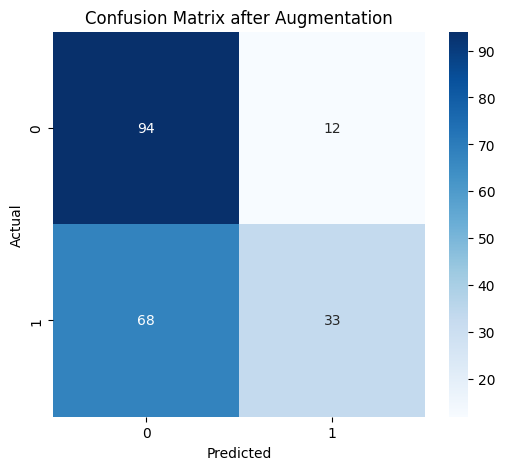

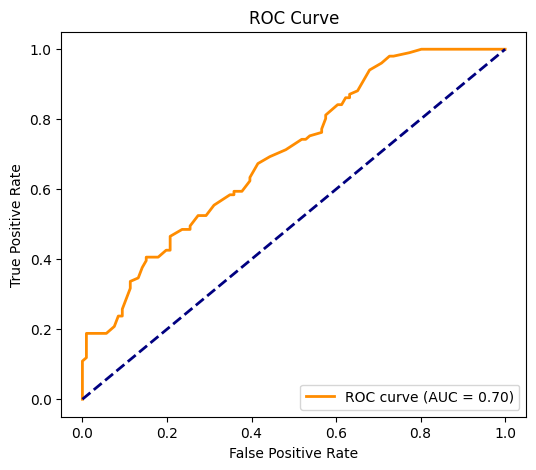

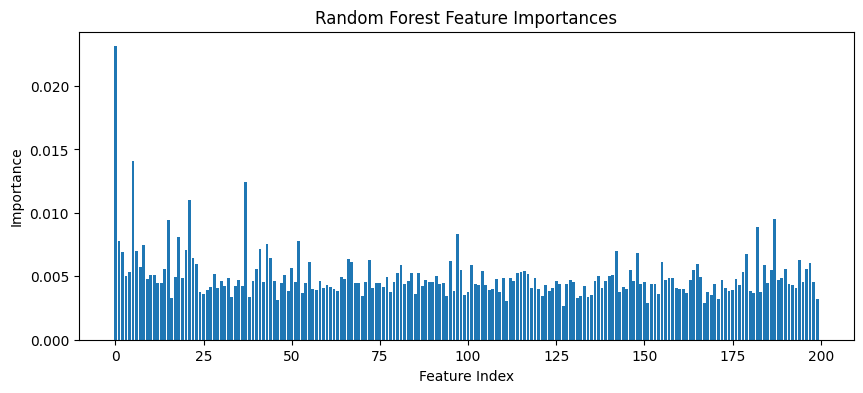

Baseline Accuracy (without GAN): 0.6184
Accuracy after GAN Augmentation: 0.6135


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix after Augmentation")
plt.show()

y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

importances = clf.feature_importances_
plt.figure(figsize=(10,4))
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

clf_base = RandomForestClassifier(n_estimators=200, random_state=42)
clf_base.fit(X_train, y_train)
y_pred_base = clf_base.predict(X_test)
acc_base = accuracy_score(y_test, y_pred_base)

print(f"Baseline Accuracy (without GAN): {acc_base:.4f}")
print(f"Accuracy after GAN Augmentation: {acc:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

X_train_aug = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_aug.npy")
y_train_aug = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_train_aug.npy")
X_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_test_pca.npy")
y_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_test.npy")

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_aug, y_train_aug)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("/content/drive/MyDrive/ABIDE_FC_DATA/confusion_matrix.png")
plt.close()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("/content/drive/MyDrive/ABIDE_FC_DATA/roc_curve.png")
plt.close()

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(20), importances[indices][:20], align="center")
plt.xticks(range(20), indices[:20])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.savefig("/content/drive/MyDrive/ABIDE_FC_DATA/feature_importance.png")
plt.close()

print("All visualizations saved as PNG in Drive.")


All visualizations saved as PNG in Drive.


step 9

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_pca.npy")
y_train = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_train.npy")
X_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_test_pca.npy")
y_test = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_test.npy")

X_train_aug = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/X_train_aug.npy")
y_train_aug = np.load("/content/drive/MyDrive/ABIDE_FC_DATA/y_train_aug.npy")

def evaluate_classifier(X_tr, y_tr, X_te, y_te, desc):
    clf = RandomForestClassifier(n_estimators=200, random_state=42)
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    cm = confusion_matrix(y_te, y_pred)
    report = classification_report(y_te, y_pred, digits=4)
    print(f"--- {desc} ---")
    print(f"Test Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    return acc

acc_before = evaluate_classifier(X_train, y_train, X_test, y_test, "Before Augmentation")
print(f"\nSummary of Performance:")
print(f"Accuracy: {acc_after:.4f}")



Summary of Performance:
Accuracy: 0.6135


save gan model

In [ ]:
import torch
G_path = "/content/drive/MyDrive/ABIDE_FC_DATA/generator.pth"
D_path = "/content/drive/MyDrive/ABIDE_FC_DATA/discriminator.pth"

torch.save(G.state_dict(), G_path)
torch.save(D.state_dict(), D_path)

print("GAN models saved successfully!")


GAN models saved successfully!


to load gan model later

In [ ]:
G_loaded = Generator().to(device)
D_loaded = Discriminator().to(device)

G_loaded.load_state_dict(torch.load(G_path))
D_loaded.load_state_dict(torch.load(D_path))

G_loaded.eval()
D_loaded.eval()

print("GAN models loaded successfully!")


GAN models loaded successfully!


save classifier

In [ ]:
import joblib

clf_path = "/content/drive/MyDrive/ABIDE_FC_DATA/random_forest_clf.pkl"
joblib.dump(clf, clf_path)

print("Random Forest classifier saved successfully!")


Random Forest classifier saved successfully!


load classifier

In [ ]:
clf_loaded = joblib.load(clf_path)
print("Random Forest classifier loaded successfully!")


In [ ]:
z = torch.randn(400, noise_dim, device=device)
synthetic_samples = G(z).detach().cpu().numpy()
synthetic_labels = np.random.randint(0, 2, size=(400,))

SAVE_DIR = "/content/drive/MyDrive/ABIDE_FC_DATA"
np.save(f"{SAVE_DIR}/gan_synthetic_samples_final.npy", synthetic_samples)
np.save(f"{SAVE_DIR}/gan_synthetic_labels_final.npy", synthetic_labels)

print("Synthetic samples shape:", synthetic_samples.shape)
print("Synthetic labels shape:", synthetic_labels.shape)


Synthetic samples shape: (400, 200)
Synthetic labels shape: (400,)
